In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numexpr
%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = [8, 6]

In [19]:
lora_mons_static = pd.read_pickle('../data/lora_mons_static_clean.pkl.gz')
battery = lora_mons_static.query('gtw_id == "eui-0000024b08030186"')[['received', 'battery', 'dev_id']]
battery.set_index('received', inplace=True)
battery.index = battery.index.tz_convert('Europe/Brussels')
batt_by_dev = battery.groupby('dev_id').resample('H').mean()

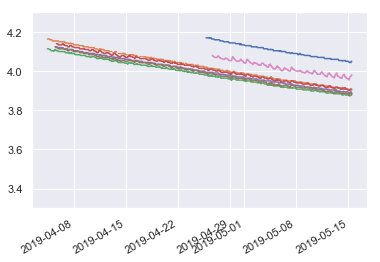

In [8]:
fig, ax = plt.subplots()
ax.plot(batt_by_dev.pivot_table(index='received', columns='dev_id', values='battery'))
ax.set_ylim([3.3, 4.3])
fig.autofmt_xdate()

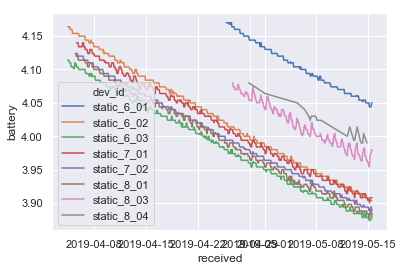

In [15]:
g = sns.lineplot(x='received', y='battery', hue='dev_id', data=batt_by_dev.reset_index())

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

exp = batt_by_dev.reset_index()
x = (exp['received'].tz_localize(None) - pd.Timestamp('20190423')).dt.total_seconds()
y = exp['battery']
model.fit(x, y)


TypeError: index is not a valid DatetimeIndex or PeriodIndex